In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Password Dictionaries

> An analysis of password datasets agregated from breaches. Dataset retreived from https://github.com/robinske/password-data

In [8]:
!pip install wordcloud

     |████████████████████████████████| 364 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 2.9 MB/s eta 0:00:01


In [46]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import os
%matplotlib inline

In [64]:
df=None
file_limit=800
rows=100000
root='data/password-data/passwords/'

for i,file in enumerate(os.listdir(root)):
    print('Loading: ',file)
    if df is None:df=pd.read_csv(root+file,nrows=rows)
    else:         df=df.append(pd.read_csv(root+file,nrows=rows))
    if file_limit<i:break

Loading:  part-00002-abca9f4b-5795-47ee-8382-f523480a532f.csv
Loading:  part-00008-abca9f4b-5795-47ee-8382-f523480a532f.csv
Loading:  part-00052-abca9f4b-5795-47ee-8382-f523480a532f.csv
Loading:  part-00091-abca9f4b-5795-47ee-8382-f523480a532f.csv
Loading:  part-00000-abca9f4b-5795-47ee-8382-f523480a532f.csv
Loading:  part-00042-abca9f4b-5795-47ee-8382-f523480a532f.csv
Loading:  part-00083-abca9f4b-5795-47ee-8382-f523480a532f.csv
Loading:  part-00005-abca9f4b-5795-47ee-8382-f523480a532f.csv
Loading:  part-00011-abca9f4b-5795-47ee-8382-f523480a532f.csv
Loading:  part-00004-abca9f4b-5795-47ee-8382-f523480a532f.csv
Loading:  part-00059-abca9f4b-5795-47ee-8382-f523480a532f.csv
Loading:  part-00087-abca9f4b-5795-47ee-8382-f523480a532f.csv
Loading:  part-00043-abca9f4b-5795-47ee-8382-f523480a532f.csv
Loading:  part-00090-abca9f4b-5795-47ee-8382-f523480a532f.csv
Loading:  part-00076-abca9f4b-5795-47ee-8382-f523480a532f.csv
Loading:  part-00010-abca9f4b-5795-47ee-8382-f523480a532f.csv
Loading:

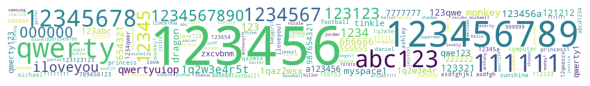

nrows: 684413 most common password: ['123456:20760336 hits']


In [69]:
stopwords=set(STOPWORDS) 
  
wordcloud = WordCloud(width = 1600, height = 200, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10)
# wordcloud.generate(' '.join([g[1] for g in df[0].items()])) 
wordcloud.generate_from_frequencies({o[1][0]:o[1][1] for o in df[["password","count"]].iterrows()})
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
most_common=None
for o in df[["password","count"]].iterrows():
    if most_common is None:              most_common={o[1][0]:o[1][1]}
    elif list(most_common.values())[0]<o[1][1]:most_common={o[1][0]:o[1][1]}
        
print(f'nrows: {len(df)} most common password: {["%s:%s hits"%(k,v) for k,v in most_common.items()]}')

In [70]:
plt.savefig('./temp.png')

<Figure size 432x288 with 0 Axes>